## 2.1 샘플  데이터셋 적재하기

In [32]:
# 16, Jan, 2024

from sklearn import datasets

## 숫자 데이터셋 적재
digits = datasets.load_digits()

## 특성 행렬 만들기
features = digits.data

## 타겟 벡터 만들기
target = digits.target

## 첫 번째 샘플 확인
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [33]:
# sklearn.datasets 모듈 아래에 있는 함수들은 파이썬 딕셔너리와 유사한 Bunch 클래스 객체를 반환합니다.
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [34]:
## DESCR 키는 데이터셋에 대한 설명을 담고 있습니다.
digits['DESCR'][:70]

'.. _digits_dataset:\n\nOptical recognition of handwritten digits dataset'

이 함수들의 유일한 매개변수인 return_X_y를 True로 설정하면 Bunch 클래스 객체가 아니라 특성 X와 타깃 y 배열을 반환합니다.
이 매개변수의 기본값은 False입니다. 특별히 load_digits 함수는 필요한 숫자 개수를 지정할 수 있는 n_class 매개변수를 추가로 제공합니다.

In [35]:
import numpy as np

## 0에서부터 4까지 다섯 개의 숫자만 적재
X, y = datasets.load_digits(n_class=5, return_X_y=True)

## 배열에 있는 고유한 값 반환
np.unique(y)

array([0, 1, 2, 3, 4])

## 2.2 모의 데이터셋 만들기

In [36]:
# 선형 회귀 - make_regression

from sklearn.datasets import make_regression

## 특성 행렬, 타깃 벡터, 정답계수를 생성
features, target, coefficients = make_regression(n_samples=100,
                                                 n_features=3,
                                                 n_informative=3,
                                                 n_targets=1,
                                                 noise=0.0,
                                                 coef=True,
                                                 random_state=1)

## 특성 행렬과 타깃 벡터 확인
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
타깃 벡터
 [-10.37865986  25.5124503   19.67705609]


In [37]:
# 분류 - make_classification

from sklearn.datasets import make_classification

## 특성 행렬, 타깃 벡터 생성
features, target = make_classification(n_samples=100,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=2,
                                       weights=[.25, .75],
                                       random_state=1)

## 특성 행렬, 타깃 벡터 확인
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
타깃 벡터
 [1 0 0]


In [38]:
# 군집 알고리즘 - make_blobs

from sklearn.datasets import make_blobs

## 특성 행렬, 타깃 벡터 생성
features, target = make_blobs(n_samples=100,
                              n_features=2,
                              centers=3,
                              cluster_std=0.5,
                              shuffle=True,
                              random_state=1)

## 특성 행렬 타깃 벡터 확인
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
타깃 벡터
 [0 1 1]


make_regression은 실수 특성 행렬과 실수 타깃 벡터를 반환
make_classification과 make_blobs는 실수 특성 행렬과 클래스의 소속을 나타내는 정수 타깃 벡터를 반환

make_regression과 make_classification의 n_informative는 타깃 벡터를 생성하는 데 사용할 특성 수를 결정합니다.
n_informative < 전체 특성 수(n_features)이면 만들어진 데이터셋에 여분의 특성이 있게 되고 특성 선택 기법을 사용해 구별해야 합니다.

또한 make_classification의 weights 매개변수를 사용해 불균형한 클래스를 가진 모의 데이터셋을 만들 수 있습니다.
예를 들어 weights = [.25, .75]는 샘플의 25%가 한 클래스이고 75%는 두 번째 클래스에 속한 데이터셋을 반환합니다.

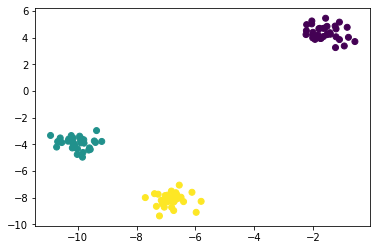

In [39]:
# make_blobs의 centers 매개변수가 생성된 클러스터의 수를 결정합니다.
# matplotlib 그래프 라이브러리를 사용하여 make_blobs에 생성한 클러스터를 시각화해보겠습니다.

import matplotlib.pyplot as plt

## 산점도 출력
plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

## 2.3 csv 파일 적재하기

In [40]:
import pandas as pd

url = 'https://bit.ly/47Hl2t5'

dataframe = pd.read_csv(url)

dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


CSV 파일을 적재할 때 두 가지 언급할 것이 있습니다. 첫째, 적재하기 전에 파일의 내용을 잠깐 확인해보는 것이 좋습니다. 데이터셋이 어떻게 구성되어 있는지, 파일을 적재하기 위해 어떤 매개변수를 설정할지 이해하는 데 크게 도움이 됩니다. 둘째, read_csv 함수의 매개변수는 30개가 넘기 때문에 문서가 엄청납니다. 다행히 대부분 매개변수는 다양한 종류의 CSV 형식을 지원하는 것입니다. 예를 들어 CSV 파일은 그 이름처럼 값들이 콤마로 구분되어 있습니다.(즉, 한 행이 2,"2015-01-01 00:00:00",0과 같습니다). 하지만 구분자로 탭 같은 다른 문자를 사용하는 CSV 파일도 흔합니다. sep 매개변수에 파일이 사용하는 구분자를 지정할 수 있습니다. 항상 그렇지는 않지만 CSV 파일에 자주 등장하는 형식 이슈는 파일의 첫 번째 줄이 열 제목을 정의하는 데 사용되는 것입니다(예를 들면, 해결에 있는 예의 경우 integer, datetime, category). header 매개변수로 제목 행이 몇 번째 줄인지 지정할 수 있습니다. 제목 행이 없으면 hear=None으로 설정합니다.

head=None일 경우 names 매개변수로 제목을 설정할 수 있습니다. header 매개변수의 기본값은 'infer'로 첫 번째 줄에서 제목을 추출합니다.

In [41]:
# skiprows 매개변수에 건너 뛸 행의 개수나 범위를 지정하고 nrows 매개변수에 읽을 행의 개수를 지정할 수 있습니다.
# 다음 코드는 1~12 번째 행을 건너뛴 다음 1개 행을 읽습니다.

dataframe = pd.read_csv(url, skiprows=range(1, 11), nrows=1)
dataframe

,integer,datetime,category
0,5,2015-01-01 00:00:10,0


## 2.4 엑셀 파일 적재하기 

In [42]:
# pip install xlrd

In [43]:
import pandas as pd

url = 'https://bit.ly/3UcfsMb'

dataframe = pd.read_excel(url, sheet_name=0, header=1)

dataframe.head(2)

,5,2015-01-01 00:00:00,0
0,5,2015-01-01 00:00:01,0
1,9,2015-01-01 00:00:02,0


이 해결은 CSV 파일을 위한 해결과 비슷합니다. 주요 차이점은 엑셀 파리에서 적재할 스프레드시트를 지정할 sheet_name 매개변수입니다. sheet_name 매개변수는 시트 이름 문자열이나 시트의 위치를 나타내는 정수(0부터 시작되는 인덱스)를 모두 받을 수 있습니다. 또는 이름이나 정수의 리스트를 전달할 수 있습니다. 예를 들어 sheet_name=[0,1,2, "Monthly Sales"]은 첫 번째, 두 번째, 세 번째 시트와 Monthly Sales 시트를 담은 판다스 데이터프레임의 딕셔너리를 반환합니다.

read_excel 함수도 na_filter, skip_rows, nrows, keep_default_na, na_values 매개변수를 지원합니다.

## 2.5 JSON 파일 적재하기

In [44]:
import pandas as pd

url = 'https://bit.ly/47OMrct'

dataframe = pd.read_json(url, orient='columns')

dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


JSON 파일을 판다스로 불러오는 것은 앞서 본 레시피들과 비슷합니다. 주요 차이점은 JSON 파일이 어떻게 구성되었는지 지정하는 orient 매개변수입니다. 어떤 매개변수값(split, records, index, columns, values)이 맞는지 알아내려면 실험이 필요합니다. 판다스는 구조화가 덜 된 JSON 데이터를 판다스 데이터프레임으로 변환하는 유용한 도구인 json_normalize 함수도 제공합니다.

- 'split': {"index": [인덱스, ...], "columns": [열, ...], "data": [값, ...]}
- 'records': [{열: 값}, ..., {열: 값}]
- 'index': {인덱스:{열: 값, ...}, ...}
- 'columns': {열: {인덱스: 값, ...}, ...}
- 'values': [값, ...]

In [45]:
# pip install sqlalchemy

## 2.6 SQL 데이터베이스로부터 적재하기

In [11]:
!powershell -command "& { (New-Object Net.WebClient).DownloadFile('https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/sample.db', 'sample.db') }"

In [12]:
# 라이브러리를 임포트합니다.
import pandas as pd
from sqlalchemy import create_engine

# 데이터베이스에 연결합니다.
database_connection = create_engine('sqlite:///sample.db')

# 데이터를 적재합니다.
dataframe = pd.read_sql_query('SELECT * FROM data', database_connection)

# 처음 두 개의 행을 확인합니다.
dataframe.head(2)

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94


이 레시피에서 먼저 SQLite 데이터베이스 엔진으로 연결하기 위해 create_engine 함수를 사용합니다 그다음 판다스의 read_sql_query 함수로 SQL을 사용하여 데이터베이스에 질의하고 그 결과를 데이터 프레임으로 가져옵니다.

In [13]:
# 데이터베이스 테이블의 모든 행을 가져오려면 read_sql_table 함수를 사용하면 편리합니다.

dataframe = pd.read_sql_table('data', database_connection)
dataframe.head(2)

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94
